# ĐỒ ÁN THỰC HÀNH: LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU
## Chủ đề: **Giá phòng trọ ở khu vực HCM**
- Môn học: Lập Trình Cho Khoa Học Dữ Liệu
- Nhóm: 6

## 1. Thu thập dữ liệu

Mô tả dữ liệu:

Link dataset:

License: CC0:

Cách thu thập dữ liệu:

## 2. Khám phá và tiền xử lý dữ liệu

### Import các thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

import warnings
warnings.simplefilter('ignore')


#!pip install pycountry
import pycountry

from scipy import stats
import matplotlib.patches as mpatches

### Đọc dữ liệu từ file json vào dataframe

File `post_info.json` cho biết những thông tin về việc thuê phòng trọ khu vực Tp.HCM.

In [2]:
room_df = pd.read_json(r'phongtro123/phongtro123/dataset/post_info.json')
room_df.rename(columns={col: col.capitalize() for col in room_df.columns}, inplace=True)
room_df.head()

,Title,Address,Price,Acreage,Content,Id,Type_post,Tenant,Posting_time,End_time,Contact,Phone_number,Zalo,Link
0,"4,8tr PHONG FULL NOI THAT DEP GIA RE TAN BINH","Dia chi: 800 Duong Lac Long Quan, Phuong 9, Qu...",4.8 trieu/thang,30m,Phong rieng tu trong toa nha 2 mat tien thoang...,614102.0,"Phong tro, nha tro",Tat ca,"Thu 5, 11:54 05/01/2023","Thu 3, 11:54 10/01/2023",Huynh Dang Quynh Trang,0938441538,0938441538,https://phongtro123.com/4-8tr-phong-full-noi-t...
1,"Cho thue phong tro moi xay, co may lanh, may g...","Dia chi: Duong Thong Nhat, Phuong 11, Quan Go ...",2.8 trieu/thang,20m,"PHONG MOI XAY, THOANG MAT, SACH SE || Dia chi:...",612543.0,"Phong tro, nha tro",Tat ca,"Thu 5, 10:00 05/01/2023","Thu 5, 10:00 12/01/2023",Co Hanh,0919170897,0919170897,https://phongtro123.com/cho-thue-phong-tro-moi...
2,PHONG TRO MOI XAY RAT DEP SO 373/1/2A DUONG LY...,"Dia chi: 373/1/2A Pho Ly Thuong Kiet, Phuong 9...",4 trieu/thang,20m,"PHONG TRO MOI, DEP SO 373/1/2a LY THUONG KIET,...",212446.0,"Phong tro, nha tro",Tat ca,"Thu 4, 20:49 04/01/2023","Thu 5, 20:49 12/01/2023",hieuthanh2006 (*),0918180057,0918180057,https://phongtro123.com/tinh-thanh/ho-chi-minh...
3,"Cho thue phong tro moi Duong Luong The Vinh, P...","Dia chi: 48/13 Duong Luong The Vinh, Phuong Ta...",1.8 trieu/thang,20m,"Gia Phong tu 1800k den xem dam bao ung y, cam ...",603145.0,"Phong tro, nha tro",Tat ca,"Chu Nhat, 13:10 01/01/2023","Chu Nhat, 13:10 08/01/2023",Nguyen Pham Duc Cuong,0938864405,0938864405,https://phongtro123.com/phong-tro-moi-xay-48-1...
4,"Cho thue phong moi dien tich 32m2, gia 5tr/tha...","Dia chi: Duong so 61, Phuong Thanh My Loi, Qua...",5 trieu/thang,32m,"Minh can cho thue phong moi dien tich 32m2, gi...",315940.0,"Phong tro, nha tro",Tat ca,"Thu 3, 15:31 20/12/2022","Thu 6, 11:04 03/02/2023",Khanh,0989997054,0989997054,https://phongtro123.com/cho-thue-phong-moi-die...


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

Tính số dòng và số cột và lần lượt lưu vào 2 biến là `num_rows` và `num_cols`. 

In [3]:
num_rows, num_cols = room_df.shape
print("Num rows: ", num_rows)
print("Num cols: ", num_cols)

Num rows:  49119
Num cols:  14


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo như quan sát sơ bộ về dữ liệu thì một dòng cho biết thông tin về quảng cáo cho thuê phòng trọ của các nơi trên địa bàn Tp.HCM.

### Dữ liệu có các dòng bị lặp không? Nếu có, xử lý những dòng bị lặp

Ta sẽ kiểm tra vụ này và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược lại.

In [4]:
have_duplicated_rows = room_df.duplicated().sum() > 0
have_duplicated_rows

False

Kết quả kiểm tra cho thấy dữ liệu không bị trùng lặp.

### Dữ liệu có bị lỗi khi thu thập không? Nếu có, xử lý những dòng lỗi này

Những dòng bị lỗi khi thu thập là những dòng có thuộc tính đều là rỗng (trừ thuộc tính `Link`) , điều này xảy ra là do bài post đó đã bị xóa khi ta thu thập dữ liệu.

In [5]:
mask=room_df['Posting_time'].isnull()
display(room_df[mask])

,Title,Address,Price,Acreage,Content,Id,Type_post,Tenant,Posting_time,End_time,Contact,Phone_number,Zalo,Link
2517,,,,,,NaN,None,None,None,None,None,None,None,https://phongtro123.com/1-phong-tro-binh-dan-g...
3681,Pass phong o khu Khang Dien Mega Village gia 3...,Dia chi: Khang Dien Mega Village Duong Vo Chi ...,3.3 trieu/thang,\n 25m,Minh can pass 1 phong cho nu phong sang xin mi...,NaN,None,None,None,None,None,None,None,https://phongtro123.com/pass-phong-o-khu-khang...
4925,CHo thue CHDV 234 Quoc lo 13 - 25m2 - Duplex -...,"Dia chi: 234 Quoc Lo 13, Phuong 26, Quan Binh ...",4.2 trieu/thang,\n 25m,"Dia chi : 234 Quoc lo 13, phuong 26, quan Binh...",NaN,None,None,None,None,None,None,None,https://phongtro123.com/cho-thue-chdv-234-quoc...
9414,,,,,,NaN,None,None,None,None,None,None,None,https://phongtro123.com/phong-tro-gac-lung-toa...
10248,Cho thue phong tro cao cap Tan Binh - cuc UU D...,"Dia chi: Duong Dong Den, Phuong 10, Quan Tan B...",4.5 trieu/thang,\n 30m,CAN HO NGAY DUONG AU CO || ---------SIEU DU A...,NaN,None,None,None,None,None,None,None,https://phongtro123.com/tinh-thanh/ho-chi-minh...
10395,"Phong tro co gac, trong toa nha rieng biet, co...","Dia chi: Duong Nguyen Sy Sach, Phuong 15, Quan...",3.6 trieu/thang,\n 18m,"Day phong moi duong Nguyen Sy Sach, gan san ba...",NaN,None,None,None,None,None,None,None,https://phongtro123.com/phong-tro-co-gac-trong...
10734,"Phong rong, anh sang, mat me, full noi that co...","Dia chi: 376/11 Duong Chu Van An, Phuong 12, Q...",3.5 trieu/thang,\n 20m,Phong tro Quan Binh Thanh. || \n376/11 Duong C...,NaN,None,None,None,None,None,None,None,https://phongtro123.com/phong-rong-anh-sang-ma...
12273,"PHONG MOI 25M2 CO GAC LUNG, CO SAN RIENG, TOIL...","Dia chi: Duong Tan Chanh Hiep 10, Phuong Tan C...",1.8 trieu/thang,\n 25m,PHONG MOI BAO GOM SAN (HIEN PHOI QUAN AO) - 25...,NaN,None,None,None,None,None,None,None,https://phongtro123.com/tinh-thanh/ho-chi-minh...
12310,,,,,,NaN,None,None,None,None,None,None,None,https://phongtro123.com/tinh-thanh/ho-chi-minh...
14056,,,,,,NaN,None,None,None,None,None,None,None,https://phongtro123.com/tinh-thanh/ho-chi-minh...


Loại bỏ những dòng này

In [6]:
room_df = room_df.drop(room_df[mask].index, axis=0)

Kích thước của dữ liệu sau khi loại bỏ các dòng bị trùng lặp và các dòng lỗi

In [7]:
num_rows, num_cols = room_df.shape
print("Num rows: ", num_rows)
print("Num cols: ", num_cols)

Num rows:  49094
Num cols:  14


### Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả về thông tin các cột trong file "post_info.json":
- **Id**: Mã tin quảng cáo cho thuê trọ.
- **Title**: Tiêu đề tin quảng cáo cho thuê trọ .
- **Address**: Địa chỉ cho thuê trọ.
- **Price**: Mức giá cho thuê trọ.
- **Acreage**: Diện tích phòng trọ.
- **Content**: Thông tin mô tả phòng trọ.
- **Type_post**: Loại tin rao quảng cáo.
- **Tenant**: Đối tượng có thể thuê trọ.
- **Posting_time**: Thời gian đăng thông báo cho thuê trọ.
- **End_time**: Thời gian kết thúc cho thuê trọ.
- **Contact**: Tên người có thể liên hệ nếu khách muốn thuê trọ.
- **Phone_number**: Số điện thoại người liên hệ.
- **Zalo**: Số Zalo người liên hệ.
- **Link**: Link của bài post

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Ta lấy dtype (kiểu dữ liệu của mỗi phần tử) của mỗi cột trong dữ liệu và lưu kết quả vào series col_dtypes; series này có index là tên cột.

In [8]:
col_dtypes = room_df.dtypes
col_dtypes

Title            object
Address          object
Price            object
Acreage          object
Content          object
Id              float64
Type_post        object
Tenant           object
Posting_time     object
End_time         object
Contact          object
Phone_number     object
Zalo             object
Link             object
dtype: object

Ta tính tỉ lệ phần trăm các giá trị bị thiếu trong các cột

In [9]:
per_null = dict(room_df.isnull().sum()*100 / num_rows)
per_null

{'Title': 0.0,
 'Address': 0.0,
 'Price': 0.0,
 'Acreage': 0.0,
 'Content': 0.0,
 'Id': 0.0,
 'Type_post': 0.0,
 'Tenant': 0.0,
 'Posting_time': 0.0,
 'End_time': 0.0,
 'Contact': 0.0,
 'Phone_number': 0.0020369087872245083,
 'Zalo': 0.0020369087872245083,
 'Link': 0.0}

Ta thấy ở thuộc tính Phone_number và Zalo còn giá trị bị thiếu, in nó ra để kiểm tra

In [10]:
mask = room_df['Phone_number'].isnull() & room_df['Zalo'].isnull()
display(room_df[mask])

,Title,Address,Price,Acreage,Content,Id,Type_post,Tenant,Posting_time,End_time,Contact,Phone_number,Zalo,Link
15236,PHONG CHO THUE FULL NOI THAT- CAO LO- QUAN 8,"Dia chi: 190 Duong Cao Lo, Phuong 4, Quan 8, H...",4.3 trieu/thang,35m,"* Chi con 1 Phong duy nhat, rat rong rai, co b...",284885.0,"Phong tro, nha tro",Tat ca,"Thu 7, 15:39 17/08/2019","Thu 6, 12:50 23/08/2019",achin151819@gmail.com,None,None,https://phongtro123.com/tinh-thanh/ho-chi-minh...


Người đăng bài đã để email thay vì số điện thoại nên dữ liệu sđt liên hệ bị thiếu.

## Tiền xử lý

### Chuyển dtype của cột "Id", "Phone_number" và "Zalo"  sang dạng chuỗi

Đầu tiên, ta nhận thấy các cột Id, Phone_number và Zalo đang có kiểu dữ liệu `float`, ta sẽ chuyển chúng về kiểu `str`. 

In [11]:
#Loại các dòng có giá trị bị thiếu
missing_df = room_df[mask]
room_df = room_df[~mask]

room_df[['Id','Phone_number','Zalo']] = room_df[['Id','Phone_number','Zalo']].astype(str)
room_df[['Phone_number','Zalo']] = room_df[['Phone_number','Zalo']].fillna('')
room_df['Phone_number'] = room_df['Phone_number'].apply(lambda x: x[:-2])
room_df['Zalo'] = room_df['Zalo'].apply(lambda x: x[:-2])
room_df['Id'] = room_df['Id'].apply(lambda x: x[:-2])

#Thêm các dòng có giá trị bị thiếu vào lại
room_df = pd.concat([room_df, missing_df])

Đặt cột Id thành Index

In [12]:
room_df.set_index('Id', inplace=True)

### Xóa các ký tự không cần thiết

- Xóa chuỗi "trieu/thang", "dong/thang" của cột Price và chuyển ô có giá trị `Thoa thuan` thành `Nan`.Sau đó chuyển tất cả về đơn vị 'triệu/tháng'

Ta sẽ chia thành 2 dataframe tương ứng với 2 đơn vị khác nhau để dễ xử lý hơn :

In [13]:
#temp là dataframe chứa các dòng với Price có đơn vị 'dong/thang'
mask = room_df['Price'].str.contains('dong/thang')
temp = room_df[mask]

#room_df chứa các dòng còn lại
room_df = room_df.drop(room_df[mask].index)

Xóa chuỗi `trieu/thang` ở cột Price và chuyển ô `Thoa thuan` thành `Nan` :

In [14]:
room_df.loc[room_df['Price'].astype(str) == 'Thoa thuan', 'Price'] = np.nan
room_df['Price'] = pd.to_numeric(room_df['Price'].str.replace(r'trieu/thang', '').str.strip())

Xóa chuỗi `dong/thang` ở cột Price :

In [15]:
#Khi chuyển 100.000 sang thập phân thì 3 chữ số 0 ở sau tự mất đi, do đó chỉ cần chia cho 1000
temp['Price'] = pd.to_numeric(temp['Price'].str.replace(r'dong/thang', '').str.strip()) / 1000

Gộp 2 dataframe đã sửa với nhau:

In [16]:
room_df = pd.concat([room_df, temp])

- Xóa chuỗi `Dia chi: ` của cột Address

In [17]:
room_df['Address'] = room_df['Address'].apply(lambda x: x[9:])

- Xóa đơn vị `m`,`m2` của cột Acreage

In [18]:
room_df['Acreage'] = room_df['Acreage'].replace('m','', regex=True).replace('m2','', regex=True) \
                    .replace('M2','', regex=True).replace(',','.', regex=True).str.strip()

#Xóa những dòng chứa kí tự lạ
mask = room_df['Acreage'].str.contains('[+-]') \
    | room_df['Acreage'].str.contains('[x\s]') \
    | room_df['Acreage'].str.contains('[~*]') 

room_df = room_df.drop(room_df[mask].index)

#Chuyển sang kiểu float
room_df['Acreage']=room_df['Acreage'].astype(float)

- Xóa thứ ngày của cột Posting_time và cột End_time

In [19]:
room_df['Posting_time'] = room_df['Posting_time'].apply(lambda x: x[-16:])
room_df['End_time'] = room_df['End_time'].apply(lambda x: x[-16:])

Cuối cùng, ta kiểm tra lại kiểu dữ liệu của từng cột sau khi đã sửa định dạng:

In [20]:
def print_real_dtype(col):
    types = room_df[col].apply(type)
    print(types.unique())
print_real_dtype('Phone_number')
print_real_dtype('Zalo')
print_real_dtype('Price')
print_real_dtype('Acreage')

[<class 'str'> <class 'NoneType'>]
[<class 'str'> <class 'NoneType'>]
[<class 'float'>]
[<class 'float'>]


Ta thấy ở 2 cột 'Phone_number' và 'Zalo' có kiểu NoneType (không có giá trị), điều này khớp với dòng có giá trị bị thiếu đã được đề cập ở trên

- Xóa các outliers giá do người dùng điền sai giá.
    - Ở đây tụi em sẽ bỏ những price lớn hơn 1 tỷ hoặc nhỏ hơn 100.000đ

In [21]:
room_df = room_df.query('Price < 1000 and Price > 0.1')

Xem lại 1 vài dòng đẩu để kiểm tra kết quả:

In [22]:
display(room_df.head(5))

,Title,Address,Price,Acreage,Content,Type_post,Tenant,Posting_time,End_time,Contact,Phone_number,Zalo,Link
Id,,,,,,,,,,,,,
614102,"4,8tr PHONG FULL NOI THAT DEP GIA RE TAN BINH","800 Duong Lac Long Quan, Phuong 9, Quan Tan Bi...",4.8,30.0,Phong rieng tu trong toa nha 2 mat tien thoang...,"Phong tro, nha tro",Tat ca,11:54 05/01/2023,11:54 10/01/2023,Huynh Dang Quynh Trang,09384415,09384415,https://phongtro123.com/4-8tr-phong-full-noi-t...
612543,"Cho thue phong tro moi xay, co may lanh, may g...","Duong Thong Nhat, Phuong 11, Quan Go Vap, Ho C...",2.8,20.0,"PHONG MOI XAY, THOANG MAT, SACH SE || Dia chi:...","Phong tro, nha tro",Tat ca,10:00 05/01/2023,10:00 12/01/2023,Co Hanh,09191708,09191708,https://phongtro123.com/cho-thue-phong-tro-moi...
212446,PHONG TRO MOI XAY RAT DEP SO 373/1/2A DUONG LY...,"373/1/2A Pho Ly Thuong Kiet, Phuong 9, Quan Ta...",4.0,20.0,"PHONG TRO MOI, DEP SO 373/1/2a LY THUONG KIET,...","Phong tro, nha tro",Tat ca,20:49 04/01/2023,20:49 12/01/2023,hieuthanh2006 (*),09181800,09181800,https://phongtro123.com/tinh-thanh/ho-chi-minh...
603145,"Cho thue phong tro moi Duong Luong The Vinh, P...","48/13 Duong Luong The Vinh, Phuong Tan Thoi Ho...",1.8,20.0,"Gia Phong tu 1800k den xem dam bao ung y, cam ...","Phong tro, nha tro",Tat ca,13:10 01/01/2023,13:10 08/01/2023,Nguyen Pham Duc Cuong,09388644,09388644,https://phongtro123.com/phong-tro-moi-xay-48-1...
315940,"Cho thue phong moi dien tich 32m2, gia 5tr/tha...","Duong so 61, Phuong Thanh My Loi, Quan 2, Ho C...",5.0,32.0,"Minh can cho thue phong moi dien tich 32m2, gi...","Phong tro, nha tro",Tat ca,15:31 20/12/2022,11:04 03/02/2023,Khanh,09899970,09899970,https://phongtro123.com/cho-thue-phong-moi-die...


### Chuyển dtype của cột "Posting_time" và "End_time"  sang datetime

Ta thực hiện việc chuyển dtype của 2 cột trên từ `object` sang `datetime` :

In [23]:
room_df['Posting_time'] = pd.to_datetime(room_df['Posting_time'], format="%H:%M %d/%m/%Y")
room_df['End_time'] = pd.to_datetime(room_df['End_time'], format="%H:%M %d/%m/%Y")

Kiểm tra lại kiểm dữ liệu:

In [24]:
print_real_dtype('Posting_time')
print_real_dtype('End_time')

[<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
[<class 'pandas._libs.tslibs.timestamps.Timestamp'>]


### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

Ta sẽ xếp các cột datetime vào nhóm numeric luôn. Hiện tại, ta đang có 4 cột thuộc nhóm numeric là: "Price", "Acreage", "Posting_time" và "End_time". 

Với mỗi cột numeric ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Kết quả sẽ được lưu vào dataframe `nume_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "min", "max" và có 4 cột là "Price", "Acreage", "Posting_time" và "End_time".

In [25]:
nume_col_df = room_df[['Price', 'Acreage', 'Posting_time', 'End_time']]

data = {"missing_ratio": nume_col_df.isna().mean().round(3) * 100,
        "min": nume_col_df.min(),
        "max": nume_col_df.max()}

nume_col_profiles_df = pd.DataFrame(data).T
nume_col_profiles_df

,Price,Acreage,Posting_time,End_time
missing_ratio,0.0,0.0,0.0,0.0
min,0.16,0.0,2015-03-04 15:05:00,2015-12-11 21:49:00
max,800.0,1300.0,2023-01-07 23:15:00,2023-02-14 08:09:00


Nhận xét:
- Tuy tỉ lệ giá trị thiếu là 0 nhưng lại có những bài đăng để thông tin 'Acreage' là 0 ! (làm cho người thấy bài đăng mơ hồ, không biết rõ diện tích phòng trọ là bao nhiêu)
- Trang web bắt đầu đăng bài từ năm 2015 đến nay.
- Có những phòng trọ rất rẻ nhưng cũng có những phòng cực kì đắt đỏ với diện tích rất lớn (giống cho thuê chung cư hơn là phòng trọ !).

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Các cột còn lại được phân vào dạng categorical là "Title", "Address", "Content", "Type_post", "Tenant", "Contact", "Phone_number",  "Zalo" và "Link".\
\
Với mỗi cột categorical, ta tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Ta lưu kết quả vào dataframe `cate_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals"; và có 9 cột là "Title", "Address", "Content", "Type_post", "Tenant", "Contact", "Phone_number",  "Zalo" và "Link".

In [26]:
cate_col_df = room_df[["Title", "Address", "Content", "Type_post", "Tenant", "Contact", "Phone_number", "Zalo", "Link"]]
cate_col_profiles_dict = {}

missing_ratio = cate_col_df.apply(lambda x: x.isna().mean() * 100, axis = 0)
diff_vals = cate_col_df.apply(lambda x: list(x.value_counts(dropna = True).index), axis = 0)
num_diff_vals = diff_vals.apply(len)

cate_col_profiles_df = pd.DataFrame([missing_ratio, num_diff_vals, diff_vals] \
                                    , index = ["missing_ratio", "num_diff_vals", "diff_vals"] )
cate_col_profiles_df

,Title,Address,Content,Type_post,Tenant,Contact,Phone_number,Zalo,Link
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.002073,0.002073,0.0
num_diff_vals,47188,27711,47129,4,3,20396,23259,23052,48243
diff_vals,"[Ki tuc xa 54/20 Bach Dang gan san bay, cong v...","[Duong Nguyen Thi Thap, Phuong Binh Thuan, Qua...","[, , **Tien ich can phong: || - May lanh. || ...","[Phong tro, nha tro, Nha thue nguyen can, Tim ...","[Tat ca, Nu, Nam]","[chu nha, Tran Van Tinh, quantri, He Thong 120...","[07969416, 09174603, 09749292, 09027146, 07741...","[09176861, 07969416, 09174603, 09749292, 09027...",[https://phongtro123.com/phong-tro-noi-that-ca...


Có vẻ như không có gì bất thường, đúng với những mô tả ở trên.

## 3. Đưa ra các câu hỏi có ý nghĩa cần trả lời

Sau khi đã khám phá dữ liệu và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể được trả lời bằng dữ liệu:
- Top 3 quận có giá tiền thuê trọ trung bình cao nhất và thấp nhất?
    
        Ý nghĩa: với câu hỏi trên, ta biết được những khu vực tập trung nhiều phòng trọ giá rẻ nhất và mắc nhất để người thuê có thể cân nhắc chọn địa điểm sinh sống phù hợp với tài chính của mình.
- Sự biến thiên về số lượng giữa các nhà trọ mà nam giới và nữ giới có thể thuê được theo từng tiêu chí khác nhau ?

        Ý nghĩa: với câu hỏi trên, ta biết được nam và nữ có thể thuê được bao nhiêu nhà trọ dựa trên từng tiêu chí, từ đó so sánh để xem bên nào sẽ có nhiều lợi thế hơn trong việc chọn nhà trọ thích hợp cho mình.

## 4. Tiền xử lý + phân tích dữ liệu để trả lời cho từng câu hỏi

## Tiền xử lý

Để dễ dàng cho việc trả lời các câu hỏi, ta sẽ tạo ra cột District từ cột Address

In [27]:
def get_district(address):
  # Tạo một danh sách các quận huyện trong thành phố HCM
  districts = ['Quan 1', 'Quan 2', 'Quan 3', 'Quan 4', 'Quan 5', 'Quan 6', 'Quan 7', 'Quan 8', 'Quan 9', 'Quan 10', 'Quan 11', 
               'Quan 12', 'Thu Duc', 'Go Vap', 'Binh Thanh', 'Tan Binh', 'Tan Phu', 'Phu Nhuan', 'Binh Tan', 'Cu Chi', 
               'Hoc Mon', 'Binh Chanh', 'Nha Be', 'Can Gio']  
  
  # Duyệt qua các quận huyện trong danh sách và kiểm tra xem có trong chuỗi address không
  for district in districts:
    upper_district = district.upper()
    if upper_district in address.upper():
      return district
    split = upper_district.split()
    
    #Đối với các quận có đánh số thì sẽ có nhiều địa chỉ viết tắt, do đó sẽ xét thêm các trường hợp này
    if upper_district[0] == 'Q':
        number_district = split[1]                      #Số thứ tự quận
        district_type1 = 'Q' + number_district          #VD: Q5
        district_type2 = 'Q.' + number_district         #VD: Q.5
        district_type3 = 'QUAN 0' + number_district     #VD: QUAN 05
    if district_type1 in address.upper() or district_type2 in address.upper() or district_type3 in address.upper():
        return district

In [28]:
room_df['District'] = room_df['Address'].apply(get_district)
# Di chuyển cột District đến trước cột Address
# Lấy danh sách tên cột của dataframe
columns = list(room_df.columns)

# Tìm vị trí của cột "A" và "B" trong danh sách
column_index_District = columns.index('District')
column_index_Address = columns.index('Address')

# Xóa cột "A" khỏi danh sách
columns.pop(column_index_District)
# Thêm cột "A" vào sau cột "B"
columns.insert(column_index_Address, 'District')

# Đổi vị trí các cột theo danh sách mới
room_df = room_df.reindex(columns = columns)
display(room_df.head())

,Title,District,Address,Price,Acreage,Content,Type_post,Tenant,Posting_time,End_time,Contact,Phone_number,Zalo,Link
Id,,,,,,,,,,,,,,
614102,"4,8tr PHONG FULL NOI THAT DEP GIA RE TAN BINH",Tan Binh,"800 Duong Lac Long Quan, Phuong 9, Quan Tan Bi...",4.8,30.0,Phong rieng tu trong toa nha 2 mat tien thoang...,"Phong tro, nha tro",Tat ca,2023-01-05 11:54:00,2023-01-10 11:54:00,Huynh Dang Quynh Trang,09384415,09384415,https://phongtro123.com/4-8tr-phong-full-noi-t...
612543,"Cho thue phong tro moi xay, co may lanh, may g...",Go Vap,"Duong Thong Nhat, Phuong 11, Quan Go Vap, Ho C...",2.8,20.0,"PHONG MOI XAY, THOANG MAT, SACH SE || Dia chi:...","Phong tro, nha tro",Tat ca,2023-01-05 10:00:00,2023-01-12 10:00:00,Co Hanh,09191708,09191708,https://phongtro123.com/cho-thue-phong-tro-moi...
212446,PHONG TRO MOI XAY RAT DEP SO 373/1/2A DUONG LY...,Tan Binh,"373/1/2A Pho Ly Thuong Kiet, Phuong 9, Quan Ta...",4.0,20.0,"PHONG TRO MOI, DEP SO 373/1/2a LY THUONG KIET,...","Phong tro, nha tro",Tat ca,2023-01-04 20:49:00,2023-01-12 20:49:00,hieuthanh2006 (*),09181800,09181800,https://phongtro123.com/tinh-thanh/ho-chi-minh...
603145,"Cho thue phong tro moi Duong Luong The Vinh, P...",Tan Phu,"48/13 Duong Luong The Vinh, Phuong Tan Thoi Ho...",1.8,20.0,"Gia Phong tu 1800k den xem dam bao ung y, cam ...","Phong tro, nha tro",Tat ca,2023-01-01 13:10:00,2023-01-08 13:10:00,Nguyen Pham Duc Cuong,09388644,09388644,https://phongtro123.com/phong-tro-moi-xay-48-1...
315940,"Cho thue phong moi dien tich 32m2, gia 5tr/tha...",Quan 2,"Duong so 61, Phuong Thanh My Loi, Quan 2, Ho C...",5.0,32.0,"Minh can cho thue phong moi dien tich 32m2, gi...","Phong tro, nha tro",Tat ca,2022-12-20 15:31:00,2023-02-03 11:04:00,Khanh,09899970,09899970,https://phongtro123.com/cho-thue-phong-moi-die...


### 4.1. Top 3 quận có giá tiền thuê trọ trung bình cao nhất và thấp nhất?

Để trả lời cho câu hỏi này, ta sẽ làm như sau:
- Bước 1: Phân loại tìm tính toán giá tiền thuê trung bình của các quận, chọn ra Top 3 quận có giá tiền thuê trọ trung bình cao nhất và thấp nhất. Ta lưu kết quả vào 2 series `rent_cost_high` và `rent_cost_low` , trong đó index là tên các quận.
- Bước 2: Từ kết quả ở trên, ta vẽ 2 đồ thị dạng cột, trong đó trục hoành là tên quận và trục tung là giá tiền thuê trung bình.Ta đặt tên trục hoành là "District" và tên trục tung là "Rent_cost".

Phân loại tìm tính toán giá tiền thuê trung bình của các quận, chọn ra Top 3 quận có giá tiền thuê trọ trung bình cao nhất và thấp nhất. Ta lưu kết quả vào 2 series `rent_cost_high` và `rent_cost_low` , trong đó index là tên các quận.

In [29]:
rent_cost = room_df.groupby('District')['Acreage'].mean().rename('Mean_cost').to_frame()
rent_cost = rent_cost.sort_values(by = ['Mean_cost'], ascending = False).reset_index()
rent_cost

,District,Mean_cost
0,Binh Chanh,33.921429
1,Quan 2,30.757220
2,Quan 9,28.958227
3,Nha Be,27.350694
4,Quan 8,27.208967
5,Thu Duc,27.127652
6,Quan 7,27.118022
7,Phu Nhuan,27.116168
8,Binh Thanh,26.939930
9,Go Vap,26.265371


Từ kết quả ở trên, ta vẽ 2 đồ thị dạng cột, trong đó trục hoành là tên quận và trục tung là giá tiền thuê trung bình.Ta đặt tên trục hoành là "District" và tên trục tung là "Rent_cost".

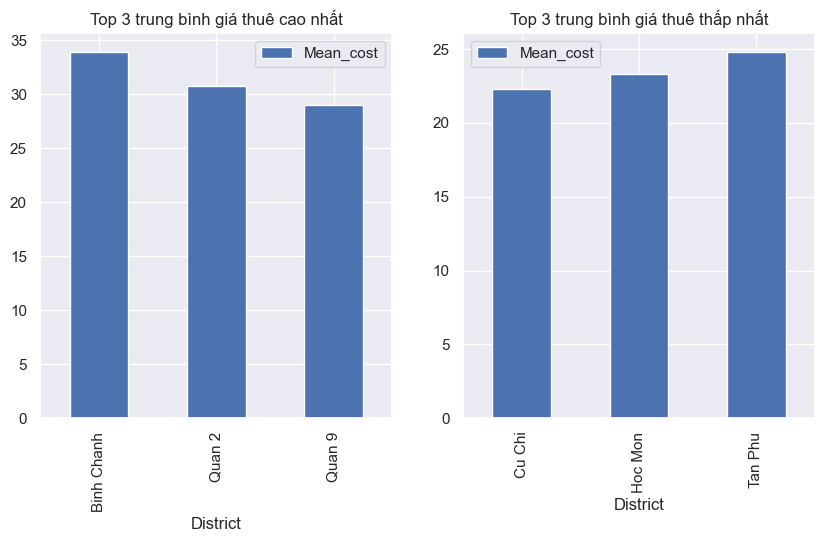

In [30]:
# Sắp xếp cột "Trung bình" theo thứ tự giảm dần và lấy ra top 3 dòng
df_top3_high = rent_cost.sort_values(by = 'Mean_cost', ascending = False).head(3)

# Sắp xếp cột "Trung bình" theo thứ tự tăng dần và lấy ra top 3 dòng
df_top3_low = rent_cost.sort_values(by = 'Mean_cost', ascending = True).head(3)

# Tạo figure với 2 subplot
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

# Vẽ biểu đồ cột cho top 3 trung bình cao nhất trên subplot đầu tiên
df_top3_high.plot.bar(x = 'District', y = 'Mean_cost', ax = ax[0])
ax[0].set_title('Top 3 trung bình giá thuê cao nhất')

# Vẽ biểu đồ cột cho top 3 trung bình thấp nhất trên subplot thứ hai
df_top3_low.plot.bar(x = 'District', y = 'Mean_cost', ax = ax[1])
ax[1].set_title('Top 3 trung bình giá thuê thấp nhất')

plt.show()

Nhìn chung, để đánh giá được mức giá thuê trọ của một khu vực là cao hay thấp, ta cần căn cứ vào nhiều yếu tố chứ không chỉ là giá tiền thuê. Tuy nhiên kết quả trên cũng phản ánh một phần độ mức chi phí thuê trọ ở các khu vực trên địa bàn Tp.HCM.

Với top 3 khu vực có mức phí thuê trọ cao nhất, các quận/huyện như Bình Chánh, quận 2, quận 9, ta có một số giải thích cho kết quả này như sau:
- Huyện Bình Chánh là một huyện có diện tích lớn nhất tại TP. Hồ Chí Minh, nó nằm trong khu vực ngoại ô thành phố và có rất nhiều khu dân cư và khu công nghiệp. Huyện Bình Chánh đang phát triển mạnh mẽ và trở thành một trong những huyện có tốc độ phát triển cao nhất tại TP. Hồ Chí Minh và có nhiều dự án đầu tư và xây dựng mới, do đó giá thuê trọ tại đây có thể khá cao so với một số huyện khác tại TP. Hồ Chí Minh.
- Quận 2 là một trong những quận có giá thuê trọ cao tại TP. Hồ Chí Minh, do nó nằm trong khu vực trung tâm thành phố và có rất nhiều tiện ích. Quận 2 có nhiều khu dân cư cao cấp và có một số trường học quốc tế hàng đầu, nên giá thuê trọ tại đây cũng khá cao.
- Quận 9 là một trong những quận có giá thuê trọ cao tại TP. Hồ Chí Minh, do nó nằm trong khu vực ngoại ô thành phố và có rất nhiều tiện ích. Quận 9 có nhiều khu dân cư cao cấp và có một số trường học quốc tế hàng đầu, nên giá thuê trọ tại đây cũng khá cao.

Với top 3 khu vực có mức phí thuê trọ thấp nhất, các quận/huyện như Hóc Môn, quận Tân Phú, quận Củ Chi, ta có một số giải thích cho kết quả này như sau:
- Hóc Môn, Củ Chi là một khu vực ngoại ô của thành phố Hồ Chí Minh. 
- Mức độ phát triển công nghiệp và kinh tế thấp hơn so với những khu vực khác trong thành phố. Điều này có thể dẫn đến một khối lượng người thuê trọ thấp hơn, và từ đó dẫn đến mức giá thuê trọ thấp hơn.
- Khu vực có tỷ lệ người dân nghèo cao hơn so với một số khu vực khác trong thành phố. Điều này có thể dẫn đến mức giá thuê trọ thấp hơn, vì người cho thuê trọ có thể muốn hạn chế chi phí cho việc thuê trọ để giảm thiểu sự rủi ro cho họ.
- Số lượng trọ cơ sở và căn hộ cho thuê lớn hơn so với một số khu vực khác trong thành phố.

### 4.2. Sự biến thiên về số lượng giữa các nhà trọ mà nam giới và nữ giới có thể thuê được theo từng tiêu chí khác nhau ?

Để trả lời cho câu hỏi này, ta sẽ làm như sau:
- Bước 1: Tìm các phòng trọ mà nam giới và nữ giới có thể thuê được, lưu vào 2 dataframe `male_avail_df` và `female_avail_df`.
- Bước 2: So sánh 2 dataframe của 2 giới tính theo 2 tiêu chí khác nhau: theo giá cả và theo diện tích phòng trọ. Ta sẽ vẽ biểu đồ đường cho tiêu chí giá cả, rồi từ đó vẽ biểu đồ hộp để trực quan mối quan hệ giữa 2 tiêu chí trên từng dataframe.

Tạo dataframe chứa những phòng trọ mà nam giới có thể thuê:

In [103]:
male_avail_df = room_df.query('Tenant == "Nam" or Tenant == "Tat ca"').reset_index(drop = True)
male_avail_df['Tenant'] = male_avail_df['Tenant'].replace('Tat ca', 'Nam')
male_avail_df = male_avail_df[['Price', 'Acreage', 'Tenant']]
male_avail_df = male_avail_df.sort_values('Price')

male_avail_df

,Price,Acreage,Tenant
43060,0.16,18.0,Nam
41408,0.18,25.0,Nam
42930,0.20,16.0,Nam
41658,0.25,12.0,Nam
43016,0.25,25.0,Nam
...,...,...,...
23857,430.00,25.0,Nam
18489,450.00,40.0,Nam
18259,450.00,40.0,Nam
18701,500.00,25.0,Nam


Tạo dataframe chứa những phòng trọ mà nữ giới có thể thuê:

In [105]:
female_avail_df = room_df.query('Tenant == "Nu" or Tenant == "Tat ca"').reset_index(drop = True)
female_avail_df['Tenant'] = female_avail_df['Tenant'].replace('Tat ca', 'Nu')
female_avail_df = female_avail_df[['Price', 'Acreage', 'Tenant']]
female_avail_df = female_avail_df.sort_values('Price')

female_avail_df

,Price,Acreage,Tenant
47184,0.16,18.0,Nu
45348,0.18,25.0,Nu
47031,0.20,16.0,Nu
47128,0.25,25.0,Nu
45612,0.25,12.0,Nu
...,...,...,...
19792,450.00,40.0,Nu
19544,450.00,40.0,Nu
20037,500.00,25.0,Nu
8329,550.00,200.0,Nu


Ta nhận thấy với cả 2 dataframe trên đều có những phòng trọ có giá thuê rất lớn. Thường giá thuê trọ với mốc 10 triệu đồng sẽ là mức giá khá đắn đo đối với rất nhiều người. Ta sẽ thử tính xem số lượng phòng trọ có giá cho thuê > 10 triệu đồng là bao nhiêu :

In [111]:
room_df.query('Price > 10').shape[0]

235

Đúng như dự đoán, số lượng trọ có giá thuê trên 10 triệu đồng là thấp hơn rất nhiều so với các mức giá còn lại. Do đó, để tiện cho việc thống kê, ta sẽ chia giá trị cột 'Price' thành từng khoảng giá khác nhau, mỗi khoảng có độ chênh lệch 1 triệu và khoảng lớn nhất sẽ là những phòng trọ có giá cho thuê >= 10 triệu đồng:

In [112]:
def price_range(val):
    for i in range(1, 11):
        if val < i:
            return str(i-1) + '-'+ str(i)
    return '>= 10'

male_avail_df['Price range'] = male_avail_df['Price'].apply(price_range)
female_avail_df['Price range'] = female_avail_df['Price'].apply(price_range)

Dataframe của nam giới lúc này:

In [113]:
male_avail_df

,Price,Acreage,Tenant,Price range
43060,0.16,18.0,Nam,0-1
41408,0.18,25.0,Nam,0-1
42930,0.20,16.0,Nam,0-1
41658,0.25,12.0,Nam,0-1
43016,0.25,25.0,Nam,0-1
...,...,...,...,...
23857,430.00,25.0,Nam,>= 10
18489,450.00,40.0,Nam,>= 10
18259,450.00,40.0,Nam,>= 10
18701,500.00,25.0,Nam,>= 10


Dataframe của nữ giới lúc này:

In [114]:
female_avail_df

,Price,Acreage,Tenant,Price range
47184,0.16,18.0,Nu,0-1
45348,0.18,25.0,Nu,0-1
47031,0.20,16.0,Nu,0-1
47128,0.25,25.0,Nu,0-1
45612,0.25,12.0,Nu,0-1
...,...,...,...,...
19792,450.00,40.0,Nu,>= 10
19544,450.00,40.0,Nu,>= 10
20037,500.00,25.0,Nu,>= 10
8329,550.00,200.0,Nu,>= 10


Vẽ biểu đồ đường thể hiện sự biến thiên số lượng của phòng trọ mà nam giới và nữ giới có thể thuê theo từng mức giá:

Text(0.5, 1.0, 'Variation of available motels over price ranges')

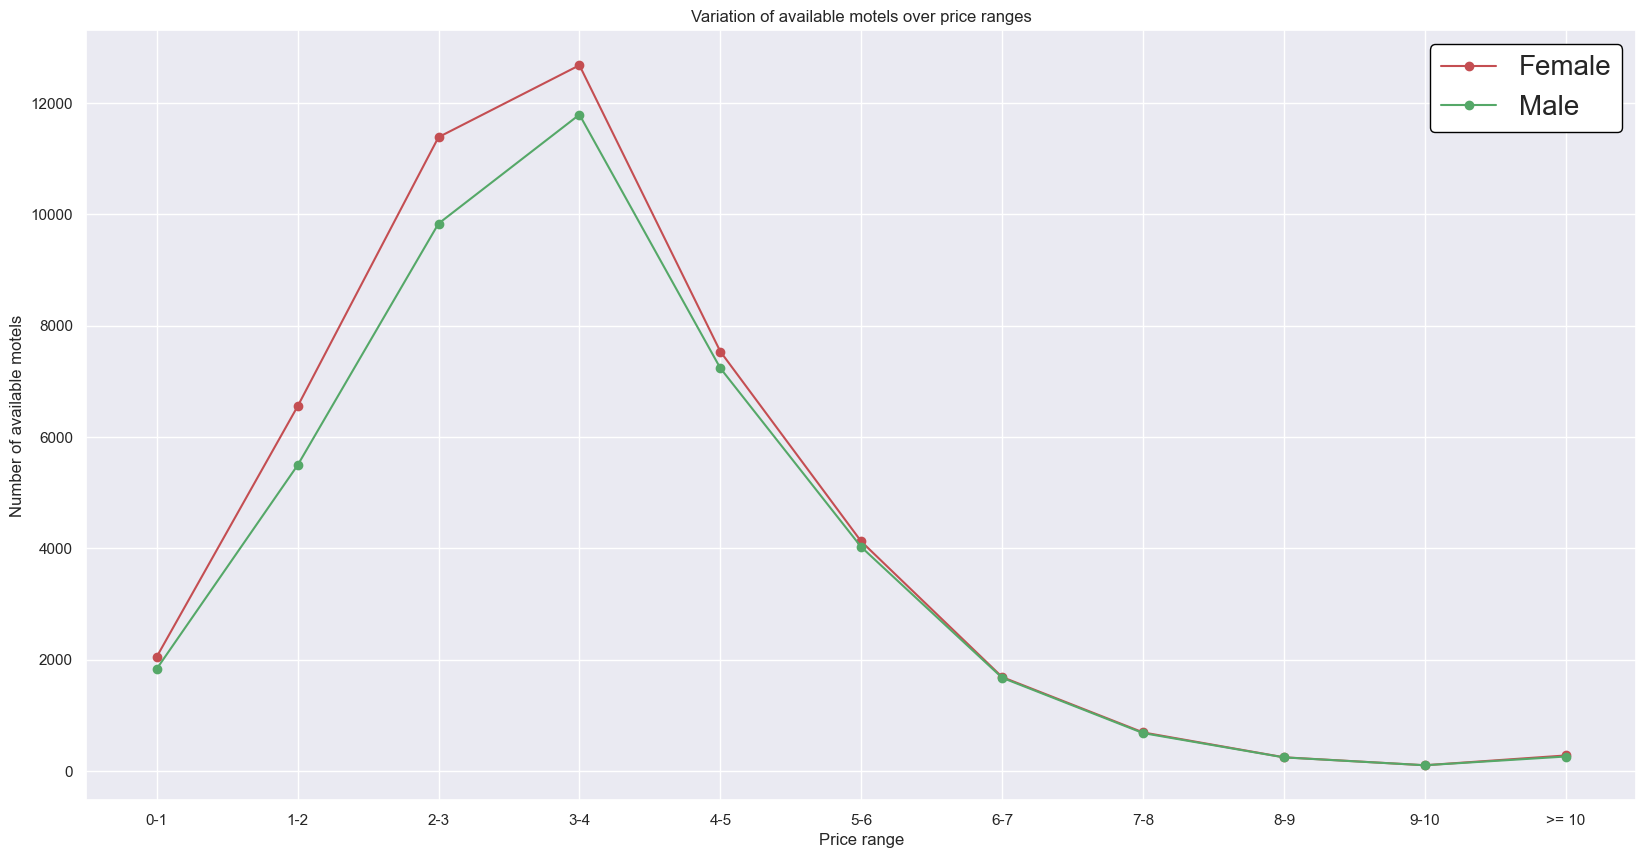

In [124]:
line_female = female_avail_df.groupby('Price range')['Tenant'].value_counts()
line_male   = male_avail_df.groupby('Price range')['Tenant'].value_counts()
plt.figure(figsize = (20, 10))
plt.xlabel('Price range')
plt.ylabel('Number of available motels')
plt.plot(line_female[:,'Nu'], color = 'r', label = 'Female', linestyle = '-', marker = 'o')
plt.plot(line_male[:,'Nam'], color='g', label = 'Male', linestyle = '-', marker = 'o')
plt.legend(facecolor = 'white', framealpha = 1, edgecolor = 'black', prop={'size': 20})
plt.title('Variation of available motels over price ranges')

Nhận xét:
- Với những trọ mà nam và nữ có thể ở, số lượng trọ tăng đột biến (xấp xỉ 6 lần từ 2000 lên 12000) qua từng khoảng giá và đỉnh điểm là từ 3-4 triệu đồng, sau đó khi giá càng tăng lên thì số lượng trọ càng giảm mạnh. Có lẽ đây là mức giá phổ biến cho tất cả các trọ trên địa bàn thành phố Hồ Chí Minh.
- Số lượng trọ cho nữ luôn luôn nhiều hơn số trọ mà nam có thể thuê, với đỉnh điểm là chênh lệch gần 1500 trọ ở khoảng giá 2-3 triệu.
- Từ mức giá 4-5 triệu trở đi, giá càng lớn thì số trọ chênh lệch giữa 2 giới là không đáng kể, có lẽ với mức giá này thì trọ sẽ dành cho cả nam và nữ đều có thể đăng ký được.

Ta làm tương tự đối với tiêu chí diện tích phòng trọ:

In [134]:
def acreage_range(val):
    for i in range(1, 21):
        if val < i * 10:
            return str((i-1) * 10) + '-'+ str(i * 10)
    return '>= 200'

male_avail_df = male_avail_df.sort_values('Acreage')
female_avail_df = female_avail_df.sort_values('Acreage')

male_avail_df['Acreage range'] = male_avail_df['Acreage'].apply(acreage_range)
female_avail_df['Acreage range'] = female_avail_df['Acreage'].apply(acreage_range)

Vẽ biểu đồ đường thể hiện sự biến thiên số lượng của phòng trọ mà nam giới và nữ giới có thể thuê theo từng diện tích:

Text(0.5, 1.0, 'Variation of available motels over acreage ranges')

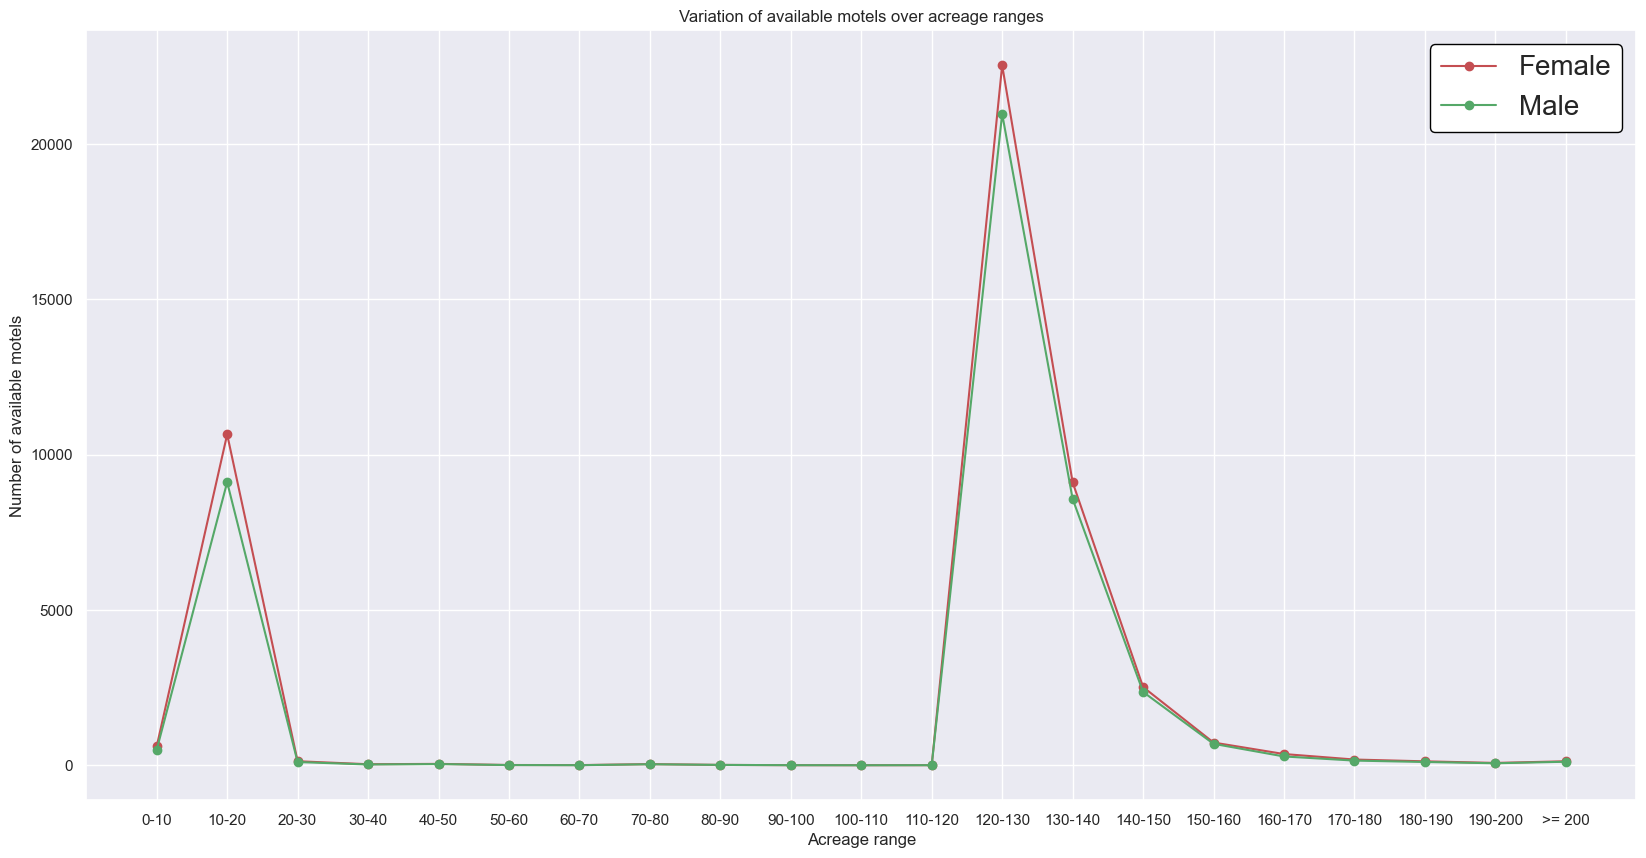

In [157]:
line_female = female_avail_df.groupby('Acreage range')['Tenant'].value_counts()
line_male   = male_avail_df.groupby('Acreage range')['Tenant'].value_counts()
ax = plt.subplots(figsize = [20, 10])[1]
plt.xlabel('Acreage range')
plt.ylabel('Number of available motels')

ax.set_xticklabels(list(male_avail_df['Acreage range'].drop_duplicates()))

plt.plot(line_female[:,'Nu'], color = 'r', label = 'Female', linestyle = '-', marker = 'o')
plt.plot(line_male[:,'Nam'], color='g', label = 'Male', linestyle = '-', marker = 'o')
plt.legend(facecolor = 'white', framealpha = 1, edgecolor = 'black', prop={'size': 20})
plt.title('Variation of available motels over acreage ranges')

Nhận xét:
- Số lượng trọ tăng mạnh rồi giảm đột ngột ở 2 đoạn : từ diện tích 0-10 m^2 đến 20-30 ( với đỉnh điểm là 10-20 m^2) và từ diện tích 110-120 m^2 đến 160-170 m^2 (đỉnh điểm là 120-130 m^2). Ở các diện tích còn lại thì số lượng trọ rất ít.
- Số lượng trọ cho nữ luôn luôn nhiều hơn số trọ mà nam có thể thuê, với đỉnh điểm là 2 khoảng diện tích đã nêu trên. Tuy nhiên lượng chênh lệch là không quá vượt trội. Điều này thể hiện rằng diện tích trọ sẵn có đối với nam và nữ là tương đương nhau.

Ta có thể quan sát thêm về mối quan hệ giữa khoảng giá và diện tích trọ đối với từng giới tính bằng biểu đồ hộp. Vì theo biểu đồ trên, số lượng trọ diện tích trên 200 m^2 là rất ít nên ta sẽ quan sát với những trọ bé hơn diện tích đấy:

Text(0.5, 1.0, 'Variation of Acreage for male motels over price ranges')

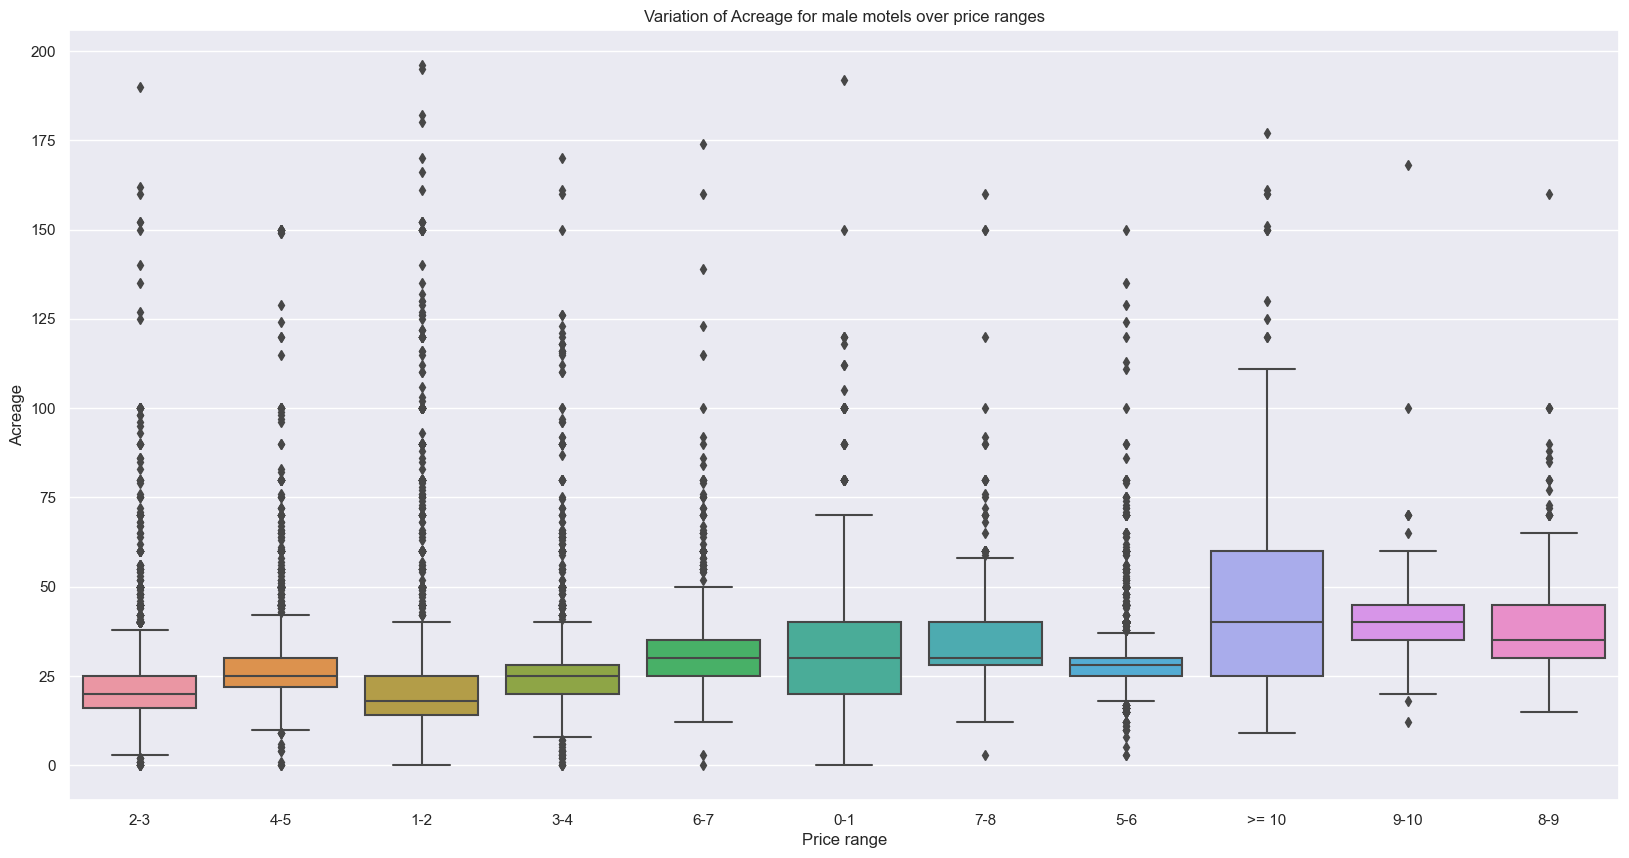

In [167]:
plt.figure(figsize = (20, 10))
sns.boxplot('Price range', 'Acreage', data = male_avail_df[male_avail_df['Acreage'] < 200])
plt.title('Variation of Acreage for male motels over price ranges')

Text(0.5, 1.0, 'Variation of Acreage for female motels over price ranges')

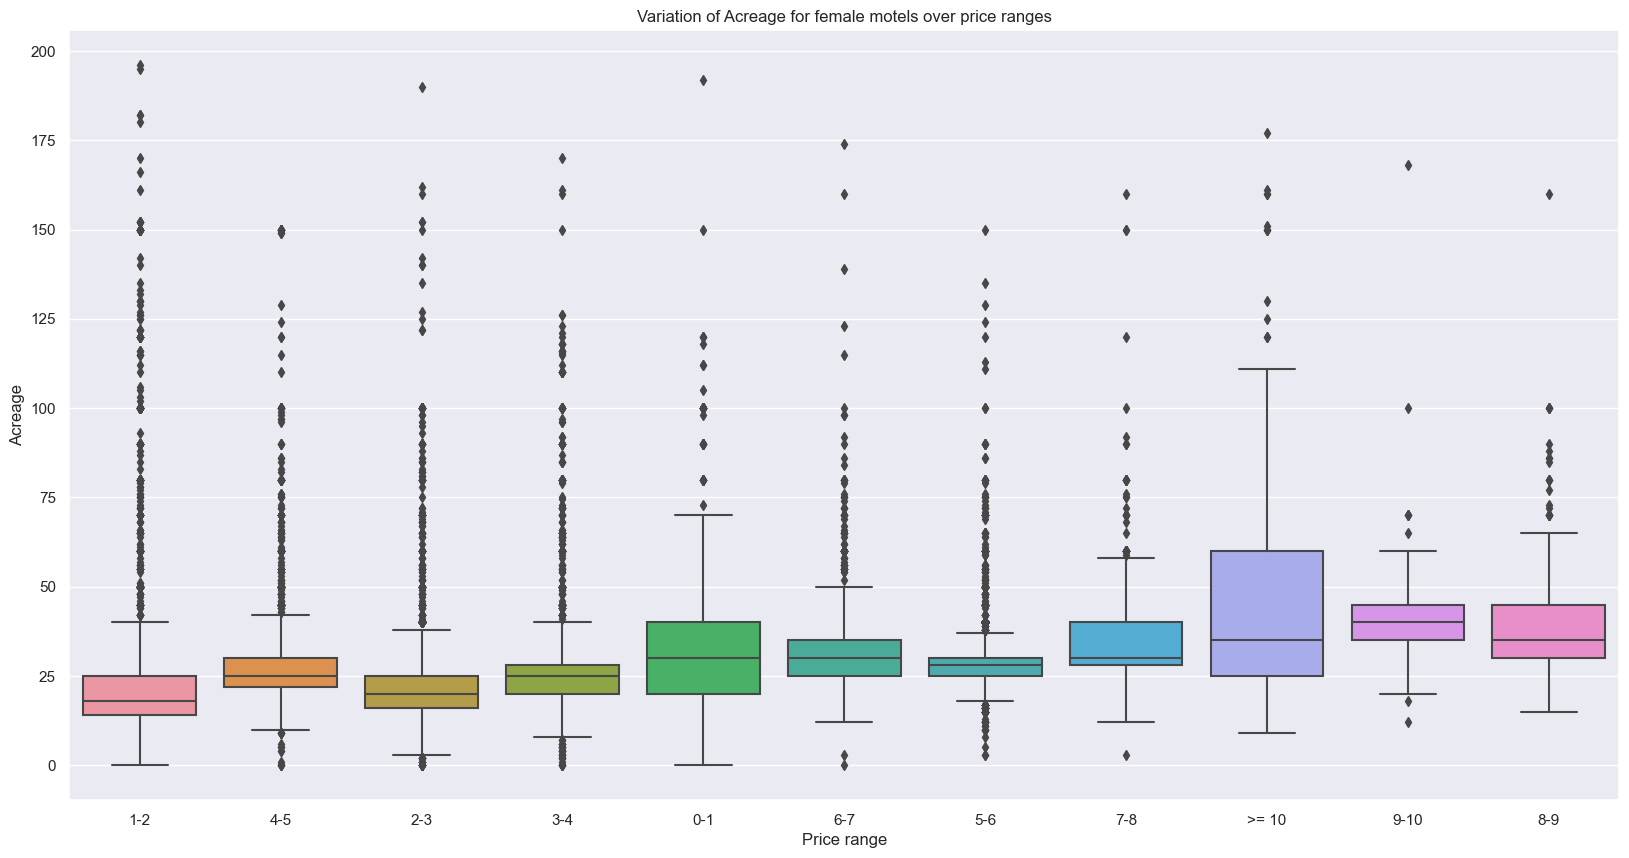

In [168]:
plt.subplots(figsize = (20, 10))
sns.boxplot('Price range', 'Acreage', data = female_avail_df[female_avail_df['Acreage'] < 200])
plt.title('Variation of Acreage for female motels over price ranges')

Biểu đồ hộp ở cả 2 giới tính là khá tương tự nhau và đa số các khoảng giá từ 0 - 9 triệu luôn có mật độ diện tích dày đặc. Điều này càng thể hiện đây là mức giá hợp lý với đủ phong phú các loại trọ diện tích khác nhau để cả nam và nữ có thể cân nhắc thuê.